## ABSTRACT

Linear Model is the form of supervised learning, in which we feed the model/algorithm set of attributes called dependent variables and dependent variable which we need to predict. Initially, we provide independent and their corresponding dependent variable to train the model. The basic idea is to obtain best fit line along our datapoints and best fit line is which has minimumm sum of distance between datapoints to our regression line. 

Basic equation for linear model can be defined as Euclidean dot product between 2 vectors: where 'w' is the weight vector and 'x' is the input vector.
$$ f(x; w) = w^T x = \sum_{0}^{D} w_i x_i $$ 

LSTM (Long Short-Term Memory network) is a type of recurrent neural network capable of remembering the past information and while predicting the future values, it takes this past information into account. LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. This is important in our case because the previous sales data is crucial in predicting its future sales.

###### Conclusion : 
We will use historical data to identify any key trends in the business, as well as develop a sales forecast to set goals for the marketing teamsusing some statistical approaches.



In [171]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

import plotly.offline as pyoff
import plotly.graph_objs as go

## THE DATA 
The Data - contains the detailed information of the dataset. The dataset contains purchases made by customers of an e-commerce business.

Dataset: https://storage.googleapis.com/comoto-interview-data/ecom_data.csv

Number of Rows: 406829                                                                                         
Number of Columns: 10

Columns present in the dataset are:                                                                            
1 -  Sales Order   
2 -  SKU             
3 -  Description                               
4 -  UnitPrice                       
5 -  CustomerID           
6 -  Channel                                                  
7 -  State
8 -  InvoiceDay           
9 -  Sales                                                  
10 - Quantity

In [167]:
#reading the data from csv file
ecom = pd.read_csv("ecom_data.csv")

## DATA CLEANING AND PROCESSING

In [149]:
#ecom.head() by default will return us the first five values of the csv file as per the input provided by us.
ecom.head(10)

,SalesOrder,SKU,Description,UnitPrice,CustomerID,Channel,State,InvoiceDay,Sales,Quantity
0,580636,22474,SPACEBOY TV DINNER TRAY,1.95,16746.0,Mailing,IL,2011-12-05,31.20,16.0
1,581426,70006,LOVE HEART POCKET WARMER,0.79,17757.0,Organic Social,WA,2011-12-08,2.37,3.0
2,575063,22697,GREEN REGENCY TEACUP AND SAUCER,2.95,16764.0,Display,TX,2011-11-08,8.85,3.0
3,544065,20726,LUNCH BAG WOODLAND,1.65,14346.0,Organic Social,TX,2011-02-15,13.20,8.0
4,568896,85049E,SCANDINAVIAN REDS RIBBONS,1.25,16361.0,Store,NY,2011-09-29,52.50,42.0
5,559542,23209,LUNCH BAG DOILEY PATTERN,1.65,17126.0,Email,CA,2011-07-10,9.90,6.0
6,569868,23493,VINTAGE DOILY TRAVEL SEWING KIT,1.95,13018.0,Organic Social,MO,2011-10-06,15.60,8.0
7,575303,23321,SMALL WHITE HEART OF WICKER,1.65,12893.0,Store,IA,2011-11-09,13.20,8.0
8,567145,21154,RED RETROSPOT OVEN GLOVE,1.25,12921.0,Organic Social,AK,2011-09-16,10.00,8.0
9,574444,21967,PACK OF 12 SKULL TISSUES,0.39,18122.0,Store,CA,2011-11-04,39.78,102.0


In [150]:
#ecom.info() will print a concise summary of a DataFrame.
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 10 columns):
SalesOrder     406829 non-null object
SKU            406829 non-null object
Description    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Channel        406829 non-null object
State          406829 non-null object
InvoiceDay     406829 non-null object
Sales          406829 non-null float64
Quantity       406829 non-null float64
dtypes: float64(4), object(6)
memory usage: 31.0+ MB


In [31]:
#ecom.shape will tell us the number of rows and columns of our dataset.
ecom.shape

(406829, 10)

In [32]:
#The below output is displaying the number of null values of all the fields.
#We have used this function to check if there are any null values present in our dataset.
ecom.isnull().sum()

SalesOrder     0
SKU            0
Description    0
UnitPrice      0
CustomerID     0
Channel        0
State          0
InvoiceDay     0
Sales          0
Quantity       0
dtype: int64

df.describe() results in 3 kind of data : Numeric Data(Default) , Object Data and Categorical Data.
df.describe() by default will include the numeric data(count,min,max,mean,std,lower percentile(default = 25%), 50 percentile and upper percentile(default = 75%)) which is displayed in our Output below.

In [33]:
ecom.describe()

,UnitPrice,CustomerID,Sales,Quantity
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,3.584609,15289.299418,67.019345,39.569822
std,74.839305,1713.914964,598.171427,315.016681
min,0.000000,12346.000000,-127788.960000,-61437.000000
25%,1.250000,13954.000000,7.980000,4.000000
50%,1.950000,15152.000000,20.800000,9.000000
75%,3.750000,16794.000000,60.000000,31.000000
max,38970.000000,18287.000000,127788.960000,97405.000000


In [34]:
ecom['Sales'] = ecom['Sales'].apply(lambda x: float("{:.2f}".format(x)))

In [35]:
ecom['UnitPrice'] = ecom['UnitPrice'].apply(lambda x: float("{:.2f}".format(x)))

In [151]:
# ecom.corr() = It computes the pairwise correlation of columns, excluding NA/null values.
ecom.corr()

,UnitPrice,CustomerID,Sales,Quantity
UnitPrice,1.000000,-0.003443,-0.100739,-0.003174
CustomerID,-0.003443,1.000000,-0.002495,-0.006864
Sales,-0.100739,-0.002495,1.000000,0.677876
Quantity,-0.003174,-0.006864,0.677876,1.000000


In [37]:
# ecom.corr().abs() = It computes the pairwise correlation of columns, excluding NA/null values with the absolute values.
ecom.corr().abs()

,UnitPrice,CustomerID,Sales,Quantity
UnitPrice,1.000000,0.003443,0.100739,0.003174
CustomerID,0.003443,1.000000,0.002495,0.006864
Sales,0.100739,0.002495,1.000000,0.677876
Quantity,0.003174,0.006864,0.677876,1.000000


 ## EXPLORATORY DATA ANALYSIS

plt.figure : will plot the figure with the provided figure size.                                                  
sns.heatmap : will plot the heatmap i.e. it will plot the correlated columns.                                     
annot= True : will display the values of correlation in the heatmap.
                                                                                                                     
I am plotting the heatmap to visualise the correlations between the columns which will help me to analyse the flow of the data while plotting different graphs           

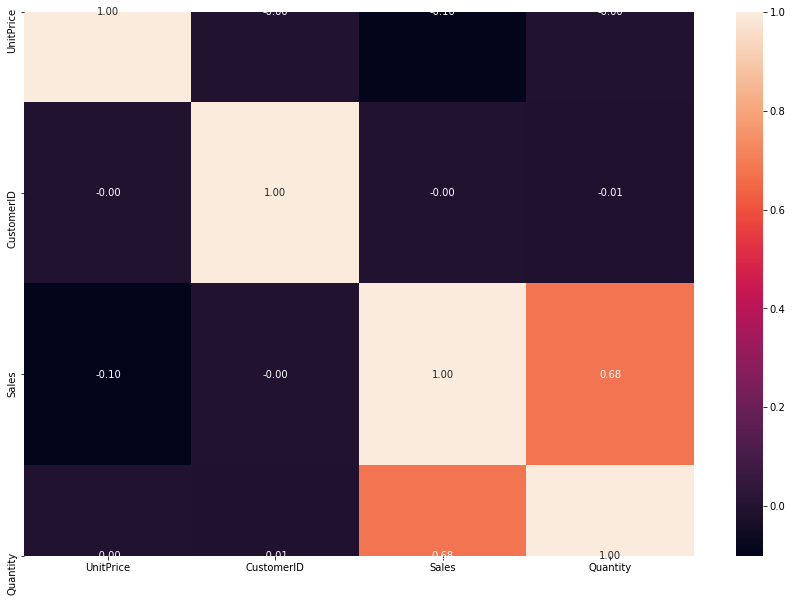

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(ecom.corr(),fmt=".2f", annot= True)

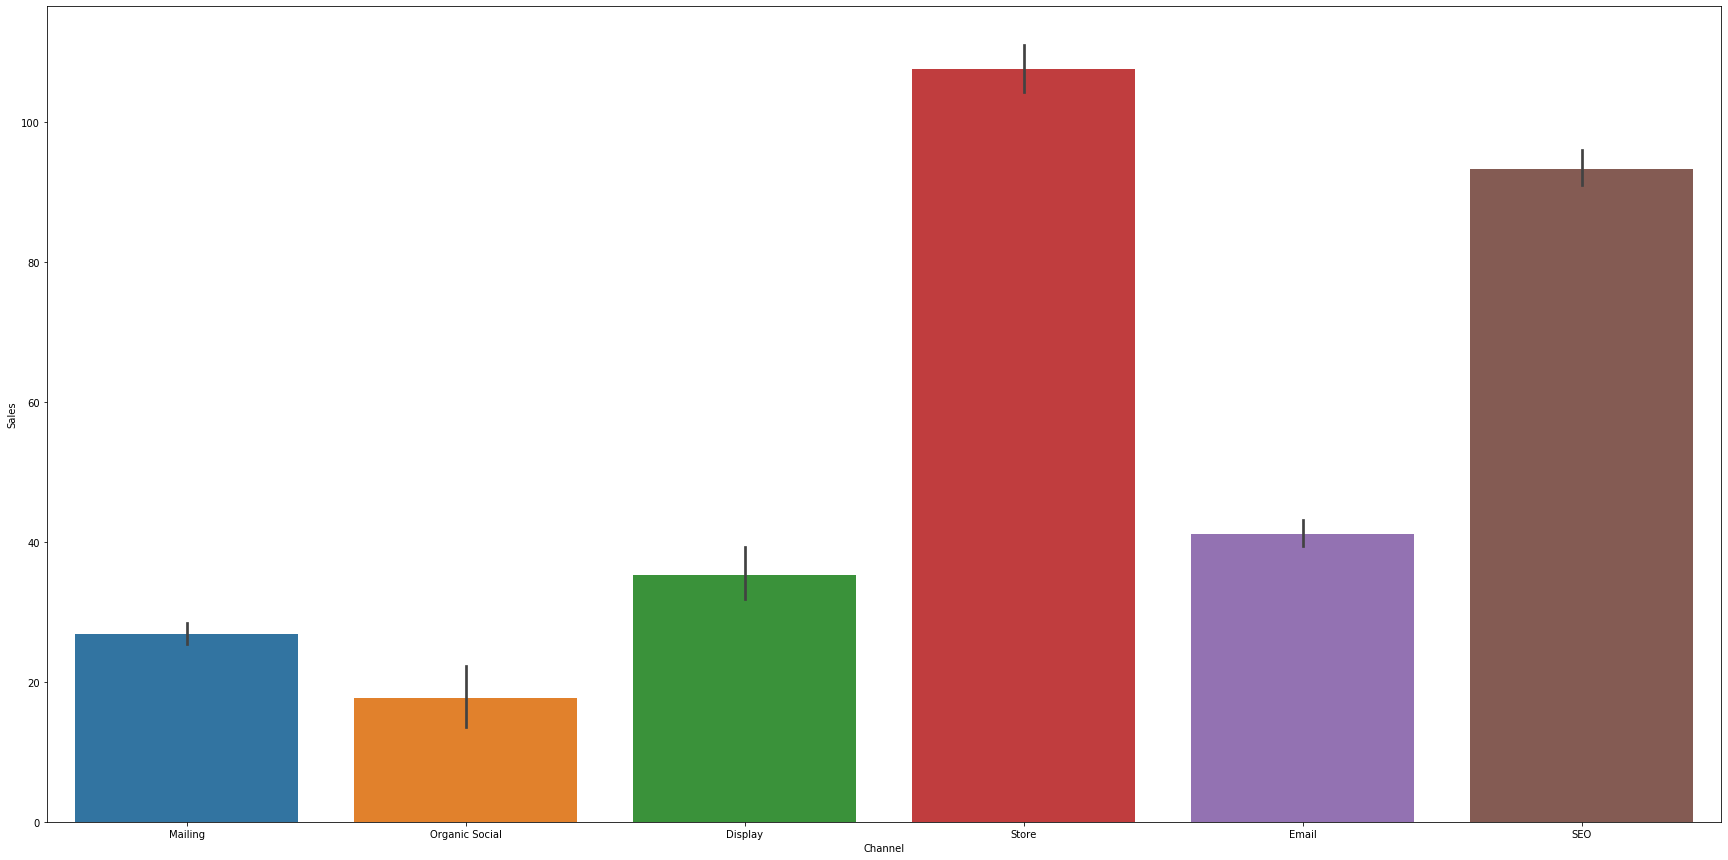

In [155]:
# I am plotting this bargraph to visualize the data between Sales and Channel columns.
plt.figure(figsize = (30,15))
sns.barplot(data = ecom, x = 'Channel', y = 'Sales')

The above bar graph shows us the trends between the Channel and the Sales. We can observe from the graph that the Store channel has the highest number of sales followed by SEO which is the second largest generator for the sales. Whereas, Organic Social has the lowest number of sales which is little surprising.

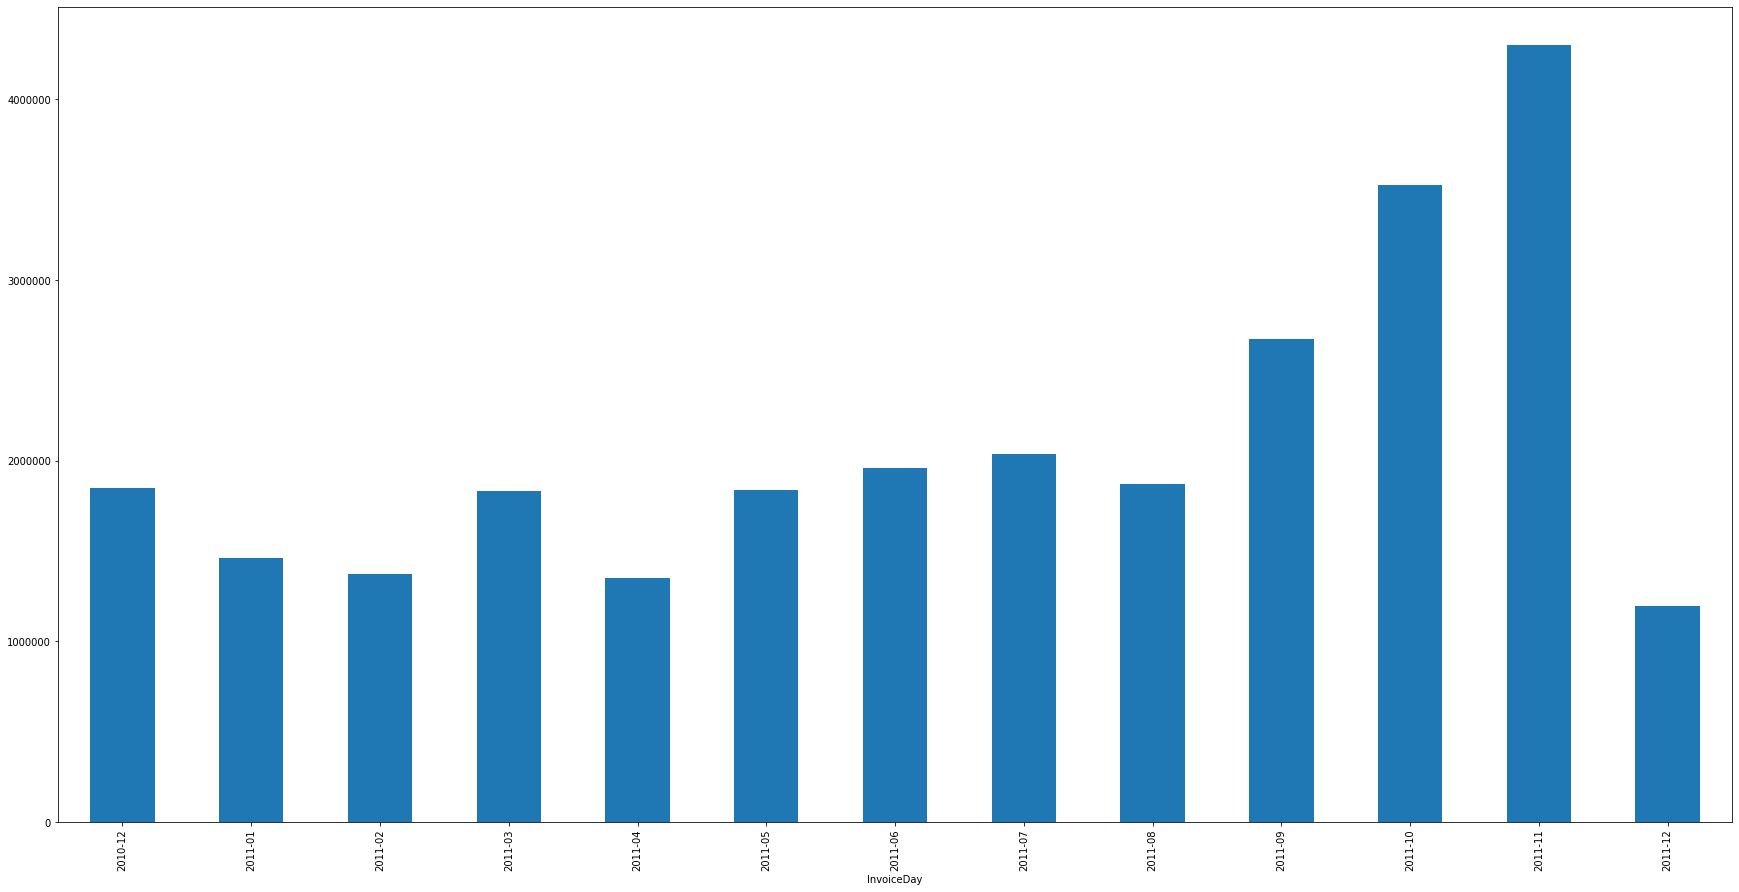

In [158]:
# I am plotting this bargraph to visualize the data between Sales and Invoice Day columns.
ecom['InvoiceDay'] = pd.to_datetime(ecom['InvoiceDay'])
df1 = ecom.groupby(df['InvoiceDay'].dt.to_period('M'))['Sales'].sum()
df1 = df1.resample('M').asfreq().fillna(0)
df1.plot(kind='bar',figsize = (30,15))

The above bargraph shows us the trends between the Invoice day and the sales. We can observe from the graph that for the November month the sales are the highest with >4000000 of sales  and lowest for the month of December at ~1500000. 

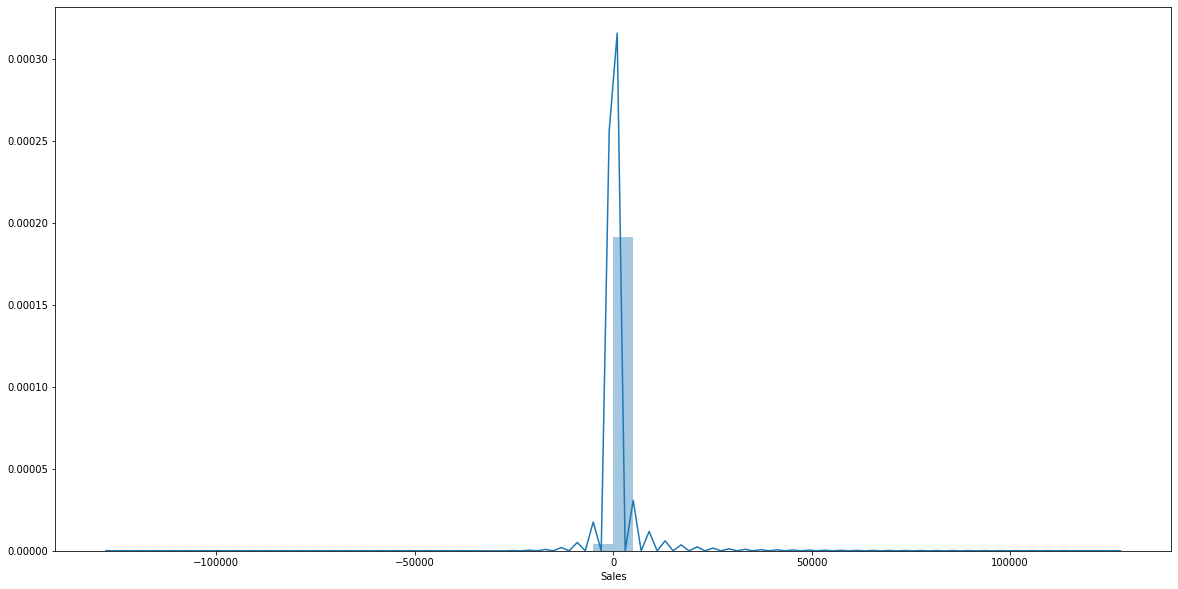

In [257]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(ecom['Sales'])

I am plotting the above distplot of my sales just to analyze the trend of my sales.From the plot I analysed that the sales are within the -50000 and 50000 and the highest peak in the sales is at 0.00030. We can observe that the sales are fluctuating and are constantly showing ups and downs.

### Create a column which tracks the number of non-refunded orders made by a customer in a rolling 90-day window.

In [159]:
ecom['InvoiceDay'] = pd.to_datetime(ecom['InvoiceDay'])

In [44]:
ecom = ecom.set_index('InvoiceDay')

In [45]:
ecom = ecom.sort_index()

In [56]:
ecom[ecom['Sales'] >0].groupby(['CustomerID'])['SalesOrder'].rolling('90d').count().reset_index()

,CustomerID,InvoiceDay,SalesOrder
0,12347.0,2010-12-07,1.0
1,12347.0,2010-12-07,2.0
2,12347.0,2010-12-07,3.0
3,12347.0,2010-12-07,4.0
4,12347.0,2010-12-07,5.0
...,...,...,...
397848,18287.0,2011-10-12,33.0
397849,18287.0,2011-10-12,34.0
397850,18287.0,2011-10-28,35.0
397851,18287.0,2011-10-28,36.0


### Create a daily sales forecast by channel for the next 90 days.

In [40]:
# value_counts() returns a Series containing counts of unique values.
ecom['Channel'].value_counts()

Store             142005
Organic Social    121971
SEO                81946
Email              36576
Mailing            20361
Display             3970
Name: Channel, dtype: int64

In [55]:
# reset_index() returns new DataFrame with labeling information in the columns under the index names, defaulting to 
#‘level_0’, ‘level_1’, etc. if any are None.

ecom.groupby(['Channel'])['Sales'].rolling('90d').sum().reset_index()

,Channel,InvoiceDay,Sales
0,Display,2010-12-01,61.20
1,Display,2010-12-01,61.20
2,Display,2010-12-01,86.20
3,Display,2010-12-01,93.70
4,Display,2010-12-01,93.70
...,...,...,...
406824,Store,2011-12-09,9033408.43
406825,Store,2011-12-09,9033526.29
406826,Store,2011-12-09,9033665.59
406827,Store,2011-12-09,9033771.84


In [108]:
# storing the value of the dataframe in a new dataframe sale.
sale = ecom.groupby(['Channel'])['Sales'].rolling('90d').sum().reset_index()

One method is to get the difference in sales compared to the previous month and build the model on it:

In [109]:
## add previous sales to the next row
sale['prev_sales'] = sale['Sales'].shift(3)

#drop the null values and calculate the difference
sale = sale.dropna()
sale['diff'] = (sale['Sales'] - sale['prev_sales'])

In [110]:
# Now we have the required dataframe for modeling the difference:
sale.head()

,Channel,InvoiceDay,Sales,prev_sales,diff
3,Display,2010-12-01,93.7,61.2,32.5
4,Display,2010-12-01,93.7,61.2,32.5
5,Display,2010-12-01,108.7,86.2,22.5
6,Display,2010-12-01,133.7,93.7,40.0
7,Display,2010-12-01,133.7,93.7,40.0


In [113]:
sale.columns

Index(['Channel', 'InvoiceDay', 'Sales', 'prev_sales', 'diff'], dtype='object')

Now we can start building our feature set. We will use the previous monthly sales data to forecast the next ones. The look-back period may vary for every model and we will take ours as 12.

So, I am creating columns from lag_1 to lag_12 and assign values by using shift() method.

In [120]:
sale_supervised = sale.drop(['prev_sales'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    sale_supervised[field_name] = sale_supervised['diff'].shift(inc)
#drop null values
sale_supervised = sale_supervised.dropna().reset_index(drop=True)

In [160]:
# Let us check out our new dataframe called sale_supervised:
sale_supervised.head()

,Channel,InvoiceDay,Sales,diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,Display,2010-12-01,331.35,26.25,131.00,135.20,110.20,65.40,61.2,61.2,25.0,40.0,40.0,22.5,32.5,32.5
1,Display,2010-12-01,338.85,8.75,26.25,131.00,135.20,110.20,65.4,61.2,61.2,25.0,40.0,40.0,22.5,32.5
2,Display,2010-12-01,453.33,123.23,8.75,26.25,131.00,135.20,110.2,65.4,61.2,61.2,25.0,40.0,40.0,22.5
3,Display,2010-12-01,460.83,129.48,123.23,8.75,26.25,131.00,135.2,110.2,65.4,61.2,61.2,25.0,40.0,40.0
4,Display,2010-12-01,485.83,146.98,129.48,123.23,8.75,26.25,131.0,135.2,110.2,65.4,61.2,61.2,25.0,40.0


### LINEAR REGRESSION

We have our feature set now and let us check how useful are our features for prediction?

I am calculating the Adjusted R-squared to check becuase it tells us how good our features explain the variation in our label (lag_1 to lag_12 for diff).

In [122]:
import statsmodels.formula.api as smf

# Define the regression formula
model = smf.ols(formula='diff ~ lag_1', data=sale_supervised)

# Fit the regression
model_fit = model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj

print(regression_adj_rsq)

0.4444852308709156


For the linear regression, we are using OLS or Ordinary-Least-Square function because it provides us with the full blown statistical information about the estimation process.

We fit a linear regression model (OLS — Ordinary Least Squares) and calculate the Adjusted R-squared. For the example above, we just used lag_1 to see how much it explains the variation in column diff.



In [123]:
model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8', data=sale_supervised)

model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.5959718418620965


In [124]:
# Adding four more features

model = smf.ols(formula='diff ~ lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12', data=sale_supervised)

model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.6154858330561841


I am spliting our data into train and test sets. As the test set, I have selected the last 6 months sales.


In [127]:
from sklearn.preprocessing import MinMaxScaler
df_model = sale_supervised.drop(['Sales','InvoiceDay', 'Channel'],axis=1)

#split train and test set
train_set, test_set = df_model[0:-6].values, df_model[-6:].values

As the scaler, we are going to use MinMaxScaler, which will scale each future between -1 and 1:

In [128]:
# Apply Min Max Scaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)

# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)

# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

### LSTM

In [129]:
# I am creating feature and label sets from scaled datasets: 

X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [144]:
X_test.shape

(6, 1, 12)

In [136]:
#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

The code block below prints how the model improves itself and reduce the error in each epoch

In [139]:
# Fit our LSTM model:

model = Sequential()
model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, shuffle=False)

Epoch 1/10
406808/406808 [==============================] - 443s 1ms/step - loss: 0.0017
Epoch 2/10
406808/406808 [==============================] - 520s 1ms/step - loss: 2.0872e-05
Epoch 3/10
406808/406808 [==============================] - 484s 1ms/step - loss: 2.0871e-05
Epoch 4/10
406808/406808 [==============================] - 631s 2ms/step - loss: 2.0873e-05
Epoch 5/10
406808/406808 [==============================] - 457s 1ms/step - loss: 2.0883e-05
Epoch 6/10
406808/406808 [==============================] - 469s 1ms/step - loss: 2.0875e-05
Epoch 7/10
406808/406808 [==============================] - 518s 1ms/step - loss: 2.0894e-05
Epoch 8/10
406808/406808 [==============================] - 512s 1ms/step - loss: 2.0919e-05
Epoch 9/10
406808/406808 [==============================] - 519s 1ms/step - loss: 2.0949e-05
Epoch 10/10
406808/406808 [==============================] - 483s 1ms/step - loss: 2.0991e-05


Let’s do the prediction and see how the results look like

In [140]:
y_pred = model.predict(X_test,batch_size=1)

In [141]:
y_pred

array([[0.9143236 ],
       [0.9143236 ],
       [0.9143235 ],
       [0.9143234 ],
       [0.91432345],
       [0.9143234 ]], dtype=float32)

In [142]:
y_test

array([[0.91505056],
       [0.9151262 ],
       [0.91512385],
       [0.91515042],
       [0.91498694],
       [0.9149792 ]])

I will perform the inverse transformation below for scaling to see the actual sales predictions because the previous results look similar but it doesn’t tell us much because these are scaled data that shows the difference.

In [211]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])

#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print (np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))

#reshape pred_test_set
pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[0.91432363 0.91504696 0.91564043 0.91571977 0.91460841 0.91394171
  0.91375185 0.91494333 0.91500646 0.91521482 0.91515293 0.91514034
  0.91491532]]
[[0.91432363 0.91505056 0.91504696 0.91564043 0.91571977 0.91460841
  0.91394171 0.91375185 0.91494333 0.91500646 0.91521482 0.91515293
  0.91514034]]
[[0.91432351 0.9151262  0.91505056 0.91504696 0.91564043 0.91571977
  0.91460841 0.91394171 0.91375185 0.91494333 0.91500646 0.91521482
  0.91515293]]
[[0.91432339 0.91512385 0.9151262  0.91505056 0.91504696 0.91564043
  0.91571977 0.91460841 0.91394171 0.91375185 0.91494333 0.91500646
  0.91521482]]
[[0.91432345 0.91515042 0.91512385 0.9151262  0.91505056 0.91504696
  0.91564043 0.91571977 0.91460841 0.91394171 0.91375185 0.91494333
  0.91500646]]
[[0.91432339 0.91498694 0.91515042 0.91512385 0.9151262  0.91505056
  0.91504696 0.91564043 0.91571977 0.91460841 0.91394171 0.91375185
  0.91494333]]


In [220]:
dates_category = sale.groupby('Channel').agg({'InvoiceDay': max, 'Channel' : 'max'})

In [221]:
dates_category['InvoiceDay']  = pd.to_datetime(dates_category['InvoiceDay'])

In [232]:
sales_dates = []
act_sales = []
for index, row in dates_category.iterrows():
    act_sales.append(sale[(sale['Channel'] == row['Channel']) & (sale['InvoiceDay'] == row['InvoiceDay'])]['Sales'].sum())
    sales_dates.append(row['InvoiceDay'])

We need to build the dataframe has the dates and the predictions. Transformed predictions are showing the difference. We should calculate the predicted sales numbers.


In [236]:
result_list = []
for index in range(0,len(pred_test_set_inverted)-1):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)

In [240]:
# predicted sales for each channel
df_result

,pred_value,date
0,166510,2011-12-09
1,28242747,2011-12-09
2,6980117,2011-12-09
3,170314693,2011-12-09
4,332293887,2011-12-09


In [260]:
from pandas import DataFrame

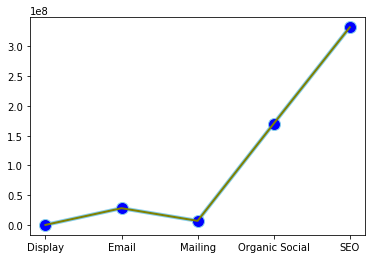

In [263]:
plt.plot( dates_category['Channel'][:5], DataFrame (act_sales[:5]),  marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( dates_category['Channel'][:5], df_result['pred_value'][:5], marker='', color='olive', linewidth=2)

The above graph shows the graph between the actual sales and the predicted sales with respect to the channel. Using LSTM our model predicted very good predictions as in the graph we can clearly see the actual sales(blue line) and the predicted sales(green) are overlapping 

## CONCLUSION

First of all we read the data and try to visualize the data without applying any algorithm. Then, preprocess the data- checks the correlation between the attributes, handling the missing value, and checked the normalization of the data to  scale all the attributes to get better prediction value. We then split our datasets into training and test sets. We feed our algorithm with training sets and further analyze its prediction on test set with actual values. For the accuracy we calculated the Adjusted R squared. Finally, we plot the predicted value with actual value and observed how much is the difference between our actual and predicted values.

<b> 3a - Explain which method you chose and why?</b>  
<b> 3b - Explain how you evaluated your results?</b>                         
<b> 3c - Summarize the accuracy of the forecast?</b>  

We applied our algorithm on the complete dataset we get, but further when try to improve our model with removing some less important column from our dataset, we observe deviation from the model we get on complete dataset. Both the regression shows positive response.So to obtain best model, we have to take care of each part like preprocess the data completely, understand the importance of each attribute with our target attribute. Filter out the data which can affect our data and keep the necessary attributes.

I have applied both Linear Regression and LSTM to create the sales forecast and to check which models performs better for our dataset. For Linear Regression model, we calculated Adjusted R-squared to check our model accuracy or how our model is perfoeming better. We get the Adjusted R-squared as 62% for our model. Another model that I used is LSTM. Initially, I calculated the predictions on y_test set which was approximately at 91%. Based on my evaluation I am chosing LSTM for my dataset as it the prediction for this model is 91% which is higher than linear regression. LSTM is capable of remembering the past information and while predicting the future values, it takes this past information into account. This is important in our case because the previous sales data is crucial in predicting its future sales.

<b> Improvements </b> 

One improvement we can do for this model is to add holidays, breaks, and other seasonal effects. They can be simply added as a new feature. By using this model, we have our baseline sales predictions



## CONTRIBUTION

I completed the assessment independently!

Own Contribution: 85%                                                                                           
External source Contribution: 10%                                                                               
Company's Contribution : 5%

## CITATION

https://pandas.pydata.org/pandas-docs/stable/reference/   

http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/

https://seaborn.pydata.org/api.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

https://scikit-learn.org/stable/modules/impute.html

https://en.wikipedia.org/wiki/Long_short-term_memory

https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/


## LICENSE

Copyright 2019 Newzy Sharma 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.